# Problem statement
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

1. Undergrad : person is under graduated or not
2. Marital.Status : marital status of a person
3. Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
4. Work Experience : Work experience of an individual person
5. Urban : Whether that person belongs to urban area or not 

In [313]:
#importing the libraries in python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [314]:
# load the dataset
df=pd.read_csv('C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 11/Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [316]:
# Renaming the columns name
df=df.rename(columns={'Marital.Status':'marital','City.Population':'population','Work.Experience':'experience','Taxable.Income':'tax'})
df


,Undergrad,marital,tax,population,experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [317]:
df.describe()

,tax,population,experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [318]:
#handling the categorical features like undergrad, marital and Urban
df1=pd.get_dummies(data=df, prefix=['Undergrad','marital','Urban'],drop_first=True)
df1

,tax,population,experience,Undergrad_YES,marital_Married,marital_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [319]:
df1['tax'].min()

10003

In [320]:
(10003-99619)/3

-29872.0

In [321]:
df1['TaxInc']=pd.cut(df1['tax'],bins=[10002,30000,99620],labels=['risky','good'])
df1

,tax,population,experience,Undergrad_YES,marital_Married,marital_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,good
1,33700,134075,18,1,0,0,1,good
2,36925,160205,30,0,1,0,1,good
3,50190,193264,15,1,0,1,1,good
4,81002,27533,28,0,1,0,0,good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,good
596,69967,55369,2,1,0,0,1,good
597,47334,154058,0,0,0,0,1,good
598,98592,180083,17,1,1,0,0,good


In [322]:
# good=1 and risky=0  handling of categorical variables"
df2=pd.get_dummies(data=df1, prefix=['TaxInc'],drop_first=True)
df2

,tax,population,experience,Undergrad_YES,marital_Married,marital_Single,Urban_YES,TaxInc_good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [323]:
# getting information about how much good and risky person are there in data set
df1['TaxInc'].value_counts()

good     476
risky    124
Name: TaxInc, dtype: int64

<AxesSubplot:>

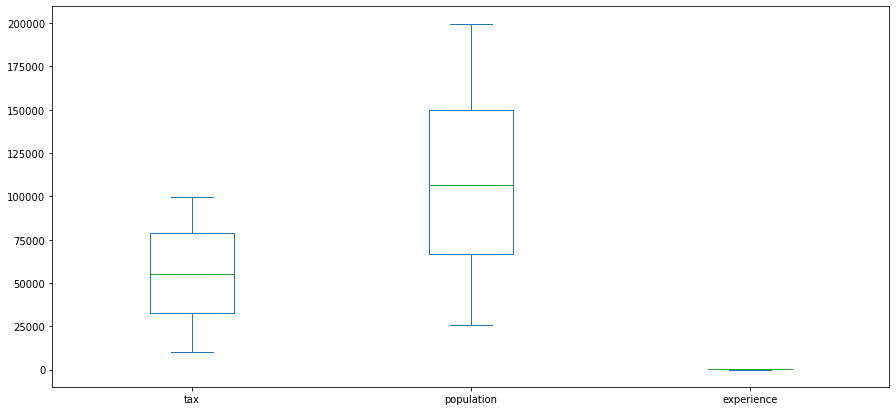

In [324]:
# ploting the boxplot to know the is their any outlier present in dataset
#sns.boxplot(df2['tax'])
plt.rcParams["figure.figsize"] = [15, 7]
df2[['tax','population','experience']].plot(kind='box')

No Outlier present in dataset

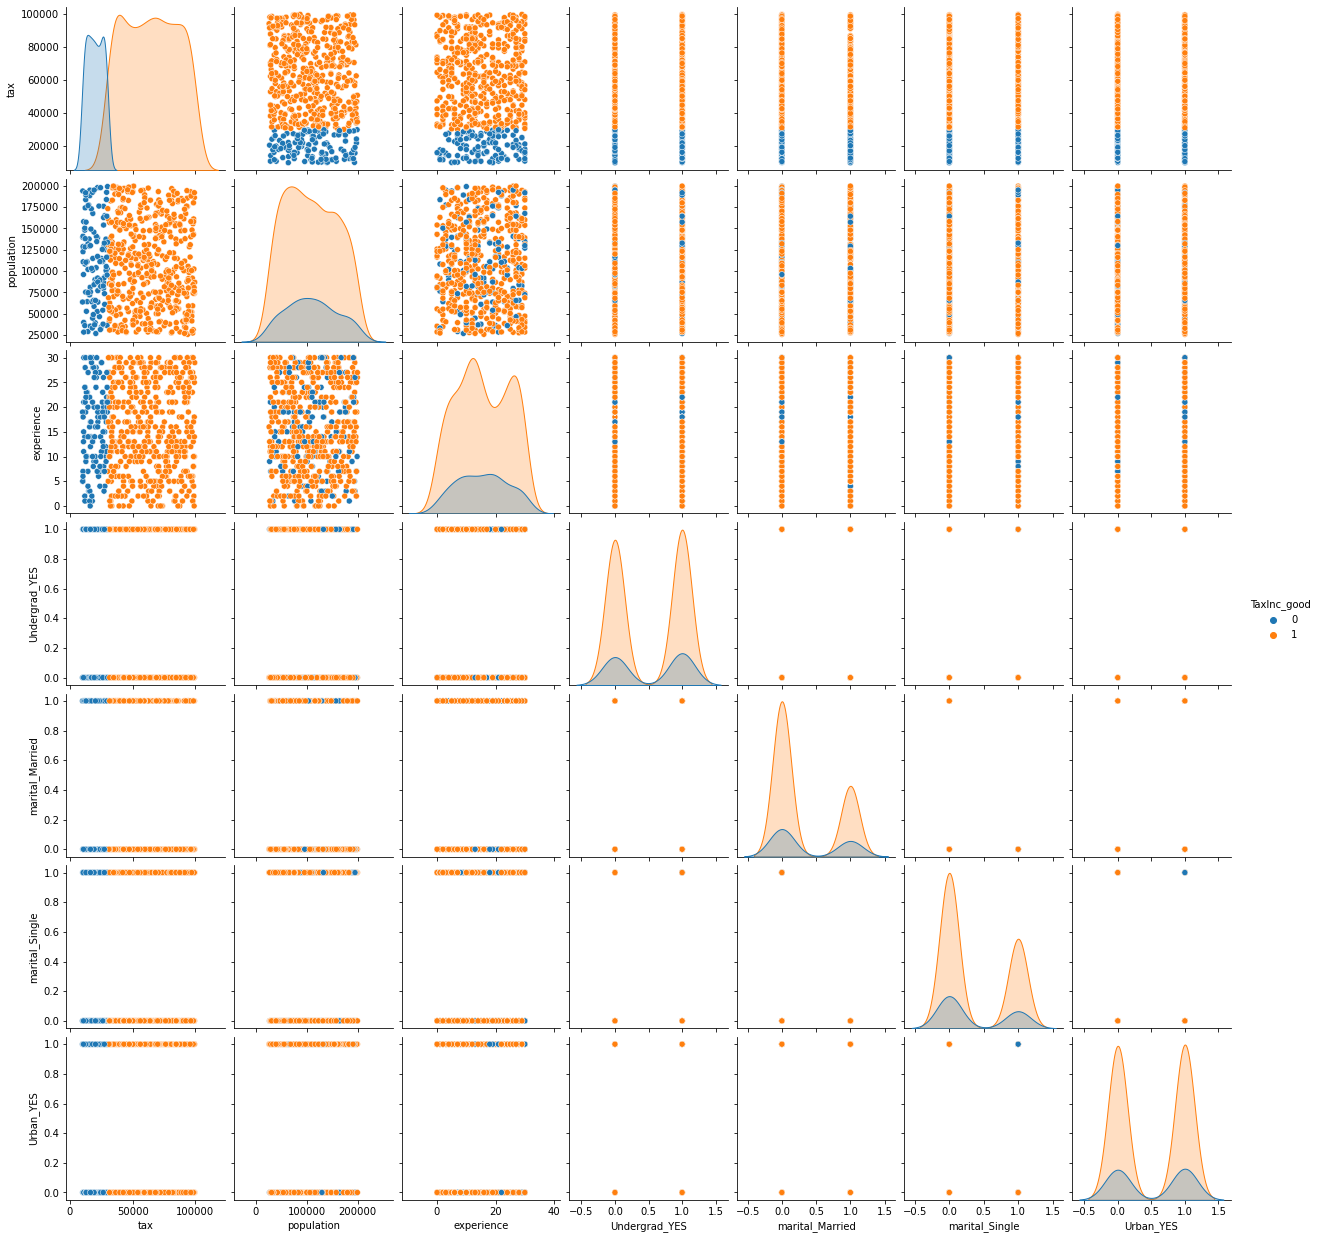

In [325]:
sns.pairplot(df2,hue='TaxInc_good')

In [326]:
# normalise the data set
def norm_funct(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [327]:
df_norm=norm_funct(df2.iloc[:,1:])
df_norm.head()

,population,experience,Undergrad_YES,marital_Married,marital_Single,Urban_YES,TaxInc_good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0


In [328]:
# declairing features and targets
x=df_norm.drop(['TaxInc_good'],axis=1)
x.head(5)

,population,experience,Undergrad_YES,marital_Married,marital_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0


In [329]:
y=df_norm['TaxInc_good']
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: TaxInc_good, Length: 600, dtype: float64

In [330]:
#spliting the data into the train and test data set
#from sklearn.model_selection import train_test_split
xtrain,Xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

# Building Decision Tree Classifier using Entropy Criteria

In [331]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(xtrain,ytrain) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5416666666666666, 0.875, 'X[1] <= 0.817\nentropy = 0.734\nsamples = 480\nvalue = [99, 381]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= 0.988\nentropy = 0.77\nsamples = 373\nvalue = [84, 289]'),
 Text(0.16666666666666666, 0.375, 'X[1] <= 0.483\nentropy = 0.759\nsamples = 369\nvalue = [81, 288]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.689\nsamples = 239\nvalue = [44, 195]'),
 Text(0.25, 0.125, 'entropy = 0.862\nsamples = 130\nvalue = [37, 93]'),
 Text(0.5, 0.375, 'X[5] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.625, 'X[1] <= 0.85\nentropy = 0.585\nsamples = 107\nvalue = [15, 92]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.8333333333333334, 0.375, 'X[0] <= 0.049\nentropy = 0.633\nsamples = 94\nvalue = [15, 79]'),
 Text(0.75, 0.125, 'entrop

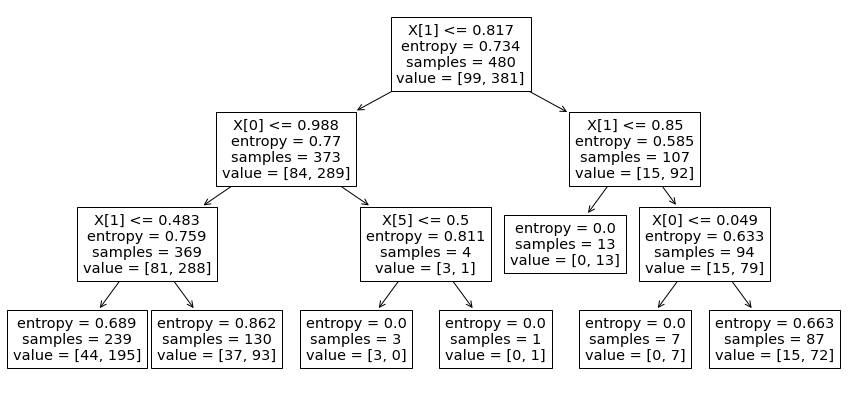

In [332]:
tree.plot_tree(model)

In [333]:
df2.columns

Index(['tax', 'population', 'experience', 'Undergrad_YES', 'marital_Married',
       'marital_Single', 'Urban_YES', 'TaxInc_good'],
      dtype='object')

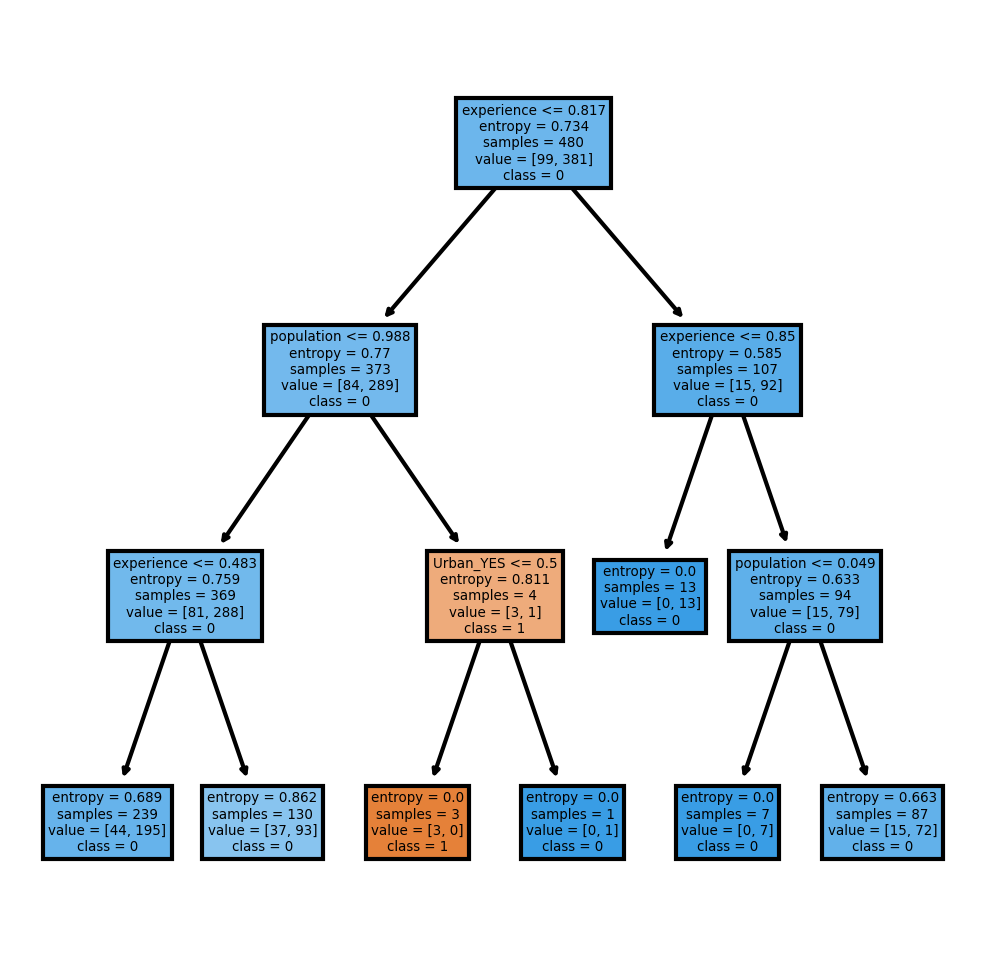

In [334]:
fn=['population','experience','Undergrad_YES','marital_Married','marital_Single', 'Urban_YES']
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [335]:
#predicting over test data
preds = model.predict(Xtest) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

1.0    119
0.0      1
dtype: int64

In [336]:
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [337]:
pd.crosstab(ytest,preds)

col_0,0.0,1.0
TaxInc_good,,
0.0,0,25
1.0,1,94


In [338]:
# Accuracy 
np.mean(preds==ytest)

0.7833333333333333

# Building Decision Tree Classifier (CART) using Gini Criteria

In [339]:
model2 = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [340]:
pred2=model2.predict(Xtest)
pred2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [341]:
np.mean(pred2==ytest)

0.7833333333333333

In [342]:
array = df2.values
X = array[:,0:3]
y = array[:,3] 

In [343]:
x

,population,experience,Undergrad_YES,marital_Married,marital_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [344]:
y

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,

In [345]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1) 

In [346]:
model3 = DecisionTreeRegressor()
model3.fit(X_train, y_train) 

DecisionTreeRegressor()

In [347]:
#Find the accuracy
model.score(X_test,y_test) 

0.51010101010101